Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']
Accuracy= 1.0
F1= 1.0
Precision= 1.0
Recall= 1.0


NameError: ignored

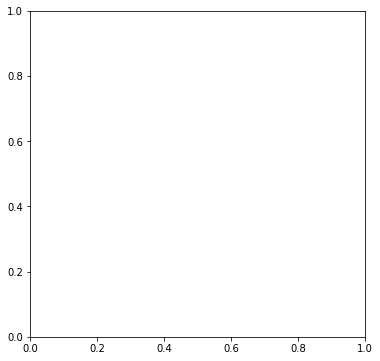

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
# загружаем данные
data_wine = load_wine()

# атрибуты
print("Features: ", data_wine.feature_names)

# метки классов
print("Labels: ", data_wine.target_names)
# 
X = data_wine.data
y = data_wine.target
# разделяем на обучающие и тестовые 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# создаем классификатор
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2)
# обучаем его
clf.fit(X_train, y_train)
# проверяем на тестовых данных
pred = clf.predict(X_test)
# считаем метрики

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score)
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average="macro")
precision = precision_score(y_test, pred, average="macro")
recall=recall_score(y_test, pred, average="macro")
print('Accuracy=',accuracy)
print('F1=',f1)
print('Precision=',precision)
print('Recall=',recall)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)
fig, ax = plt.subplots(figsize=(6,6))
cm_viz = ConfusionMatrix(clf)
cm_viz.score(X_test,y_test)
cm_viz.poof()
fig

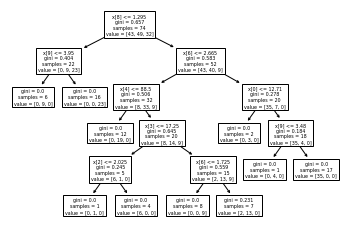

In [ ]:
# выбираем дерево из леса
estimator = clf.estimators_[5]
# рисуем его
import graphviz
from sklearn import tree
tree.plot_tree(estimator) ;

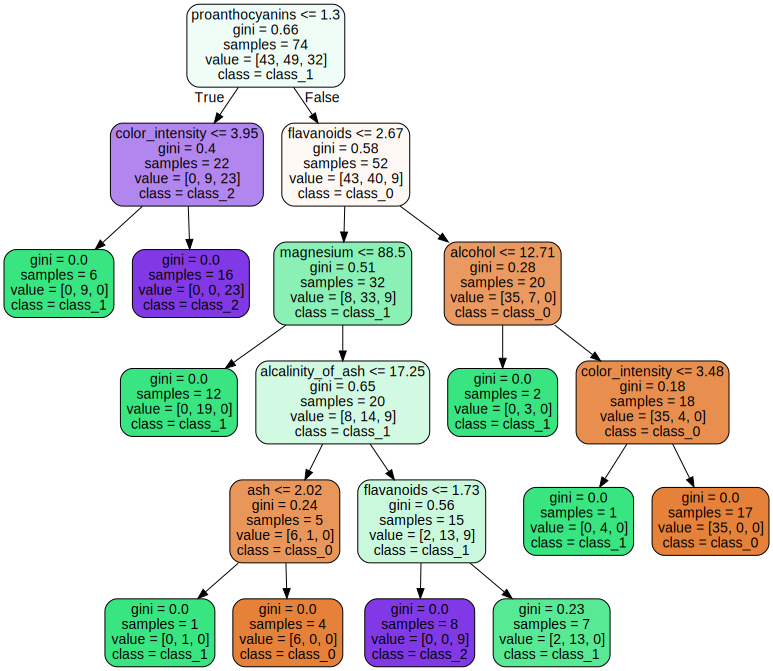

In [ ]:
tree_data=tree.export_graphviz(estimator, out_file=None, 
                feature_names = data_wine.feature_names,
                class_names = data_wine.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True);

graph=graphviz.Source(tree_data,format='png');
graph
